# CS 696 Intro to Big Data 
## Assignment 2

### Path to input files

In [1]:
vehicles='/Users/whitney/Courses/696/Spring19/Assignments/assignment2Data/vehicles.csv'
causes_of_death='/Users/whitney/Courses/696/Spring19/Assignments/assignment2Data/causes_of_death.csv'
framingham='/Users/whitney/Courses/696/Spring19/Assignments/assignment2Data/framingham.csv'

### Import statements

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t
import pandas as pd

## Issue 1: Auto Fuel Economy

### Question 1

For each company collect the MPG sold by each company in the years 2000-2019. Produce the box plots per company for the MPG over those years. How do the companies compare?

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


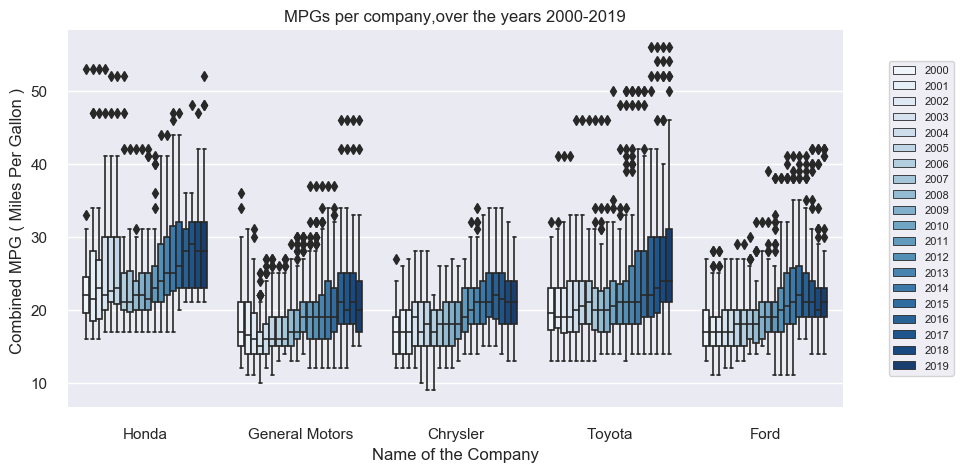

In [3]:
# to plot box plots per company for the MPG in the years 2000-2019

# define dictionary to hold sub brands of each company

sub_brands_dict = {'Cadillac':'General Motors', 'GMC':'General Motors', 'Buick':'General Motors', 
                   'Chevrolet':'General Motors','Honda':'Honda','Acura':'Honda','Ford':'Ford','Lincoln':'Ford',
                   'Chrysler':'Chrysler','Alfa Romeo':'Chrysler','Dodge':'Chrysler', 'Fiat':'Chrysler','Jeep':'Chrysler',
                   'Maserati':'Chrysler','Ram':'Chrysler','Toyota':'Toyota','Lexus':'Toyota'}

# define an array fuel to sort out Gasoline vehicles
fuel = ['Midgrade Gasoline','Premium Gasoline','Regular Gasoline']

vehicles_mpg_df = pd.read_csv(vehicles)
# create a column Company in dataframe to group the sub brands of same company under one name
vehicles_mpg_df['Company']= vehicles_mpg_df['make'].map(sub_brands_dict)

# select rows from dataframe where year equals value 2000-2019
to_plot_df = vehicles_mpg_df.loc[vehicles_mpg_df['year'].isin(range(2000,2020,1))]
#select gasoline vehicles
to_plot_df = to_plot_df.loc[to_plot_df['fuelType1'].isin(fuel)]
#drop NaN values i.e. select only those rows with the 5 company names
to_plot_df = to_plot_df.dropna(subset=['Company'])

# plot the box plot for each company over 20 years
plt.figure(figsize=(10,5),dpi=100)
sns.set(style="darkgrid")
box_plot_axes = sns.boxplot('Company','comb08',width=0.8, hue='year', linewidth=1.2, dodge = 0.9, data= to_plot_df, palette="Blues")

box_plot_axes.set_title("MPGs per company,over the years 2000-2019")
box_plot_axes.set_xlabel("Name of the Company")
box_plot_axes.set_ylabel('Combined MPG ( Miles Per Gallon ) ')
box_plot_axes.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1, fontsize=8)
sns.despine(offset=5)


#### Observation:

1. From the plot, we can say that Honda vehicles are giving the best mileage over the years, followed by Toyota.There is no clear trend amongst the other three companies(i.e Chrysler,General Motors,Ford)in terms of which company vehicles are giving a better mileage. 
2. Honda vehicles has good mileage from 2000 - 2006, the the milage has dropped from 2007 to 2011. From 2012 to 2019, they are showing an increasing trend in mileage
3. General Motors have shown an increasing trend in the years 2003 to 2019.
4. Chrysler vehicles have given better mileage in the years 2011 to 2019 when compared to their mileage from 2000 to 2010.
5. Toyota vehicles have shown almost stable mileage values until 2010, but have shown steady increase since 2010.
6. Ford has shown increase in mileage from 2011 to 2015, but in the years 2016 to 2019, mileage provided by Ford vehicles has shown a drop.

### Question 2

Plot the yearly mean in the years 2000- 2019 with confidence interval of the mpg for each
company. That is for each company compute the mean mpg over all vehicles sold by that
company per year. What changes have there been in those years? How do the companies
compare?

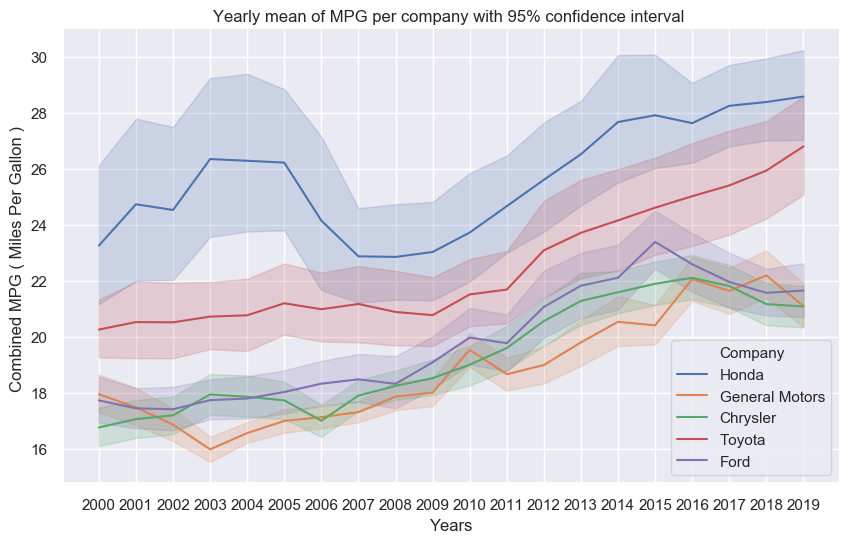

In [4]:
# to plot yearly means of each compnay in the years 2000-2019

plt.figure(figsize = (10,6), dpi = 100)
sns.set(style = "darkgrid")

# plot using line plot
# lineplot plots the mean of each year with confidence interval 
mean_axes = sns.lineplot(x = "year", y = "comb08", hue = "Company", data = to_plot_df)

mean_axes.set_title("Yearly mean of MPG per company with 95% confidence interval ")
mean_axes.set_xlabel("Years")
mean_axes.set_ylabel("Combined MPG ( Miles Per Gallon ) ")
plt.xticks(np.arange(2000, 2020, step=1))
sns.despine(offset=2)


#### Observation :

1. Honda vehicles seem to give the best mean mileage in 20 years time period, followed by Toyota. Among the remaining three, Ford has better mean mileage followed by Chrysler. General Motors vehicles seems to have the least mean mileage among the companies that are compared here.
2. Honda vehicles have shown increase in mean mileage values over the last 10 years
3. Toyota vehicles are showing only small improvement in the mean mileage from 2000-2009 with gradual improvement, but after 2009 there is a considerable improvement in the mean mileage in the following years.
4. Ford vehicles seems to show a steady improvement in mean mileage from 2000 to 2015, although they are showing a desreasing trend from 2015 onwards.
5. Chrysler vehicles have shown increase in mean MPG from 2000 to 2016,but the mean mpg has dropped in the years 2016 to 2019.
6. General Motors have shown an overall increasing trend from 2003 to 2019 in the mean MPG values.

### Question 3

Plot the mpg for each company per year of their most fuel efficient vehicle each year. What
changes have there been in those years? How do the companies compare?


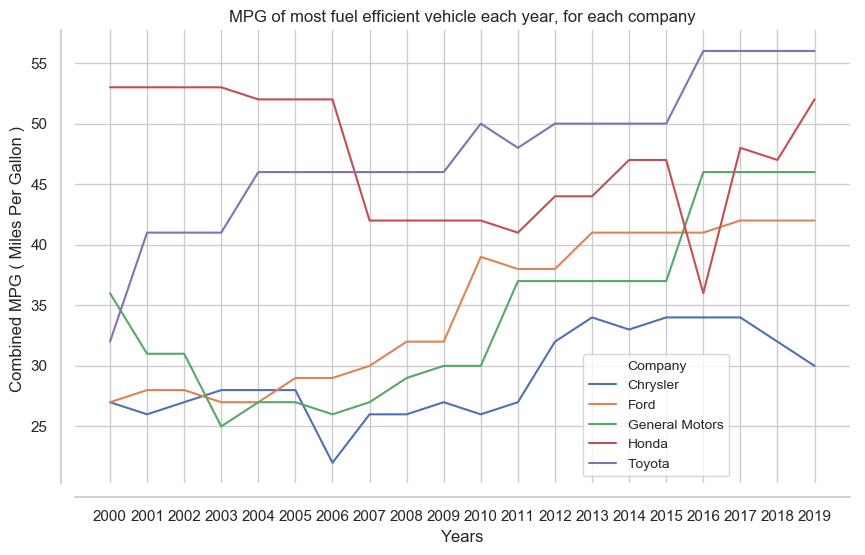

In [9]:
# to plot the mpg of most fuel efficient vehicle of each year,for each company
plt.figure(figsize=(10,6),dpi=100)
sns.set(style="whitegrid")

# find maximum mpg for each company,each year
max_df=to_plot_df.groupby(['Company','year'],as_index=False).agg({'comb08':'max'})

max_axes = sns.lineplot(x = "year", y = "comb08", hue = "Company", data = max_df)
max_axes.legend(loc = 'center', bbox_to_anchor = (0.75, 0.15), ncol = 1, fontsize = 10)
max_axes.set_title("MPG of most fuel efficient vehicle each year, for each company")
max_axes.set_xlabel("Years")
max_axes.set_ylabel("Combined MPG ( Miles Per Gallon ) ")
plt.xticks(np.arange(2000, 2020, step=1))
sns.despine(offset = 10)

#### Observation :

1. Honda has the most fuel efficient vehicle from 2000 to 2006 over all the other companies.
2. After 2006, Toyota has the most fuel efficient vehicle till 2019.
3. From 2006 to 2015, Ford has better vehicle in the most fuel efficient category over General Motors and Chrysler. From 2016, General Motors has overtaken Ford in this category.
4. Chrysler is the least performing company in the most fuel efficient category in the years 2006 to 2019.

## Issue 2 : Diet and Death

Plot the death rate for each disease over time from the data set causes_of_death.csv

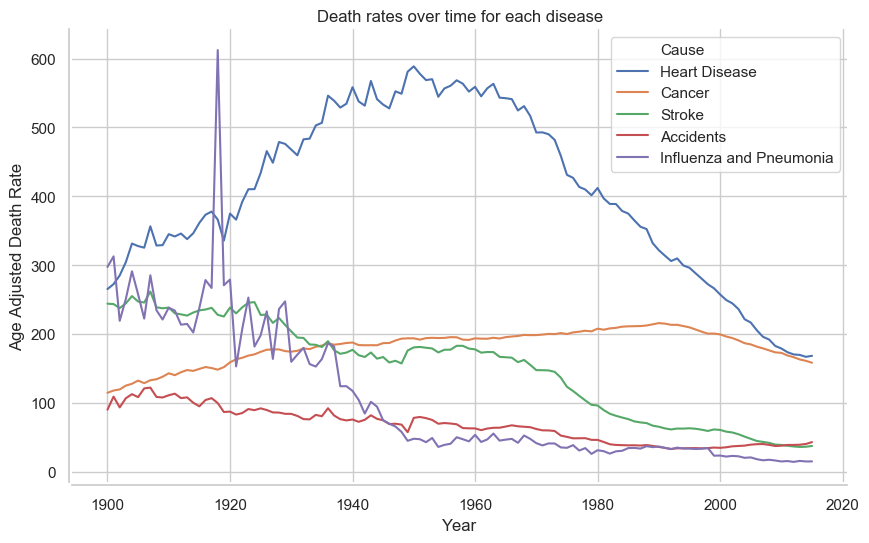

In [5]:
#Plot death rates over time for each disease

causes_df = pd.read_csv(causes_of_death)

plt.figure(figsize=(10,6),dpi=100)
sns.set(style="whitegrid")
cause_ax = sns.lineplot(x="Year", y="Age Adjusted Death Rate", hue="Cause", data=causes_df)

cause_ax.set_title("Death rates over time for each disease")
sns.despine(offset = 2)

### Question 4

What is the percentage of people in the study that have diabetes?

In [6]:

# read Framingham study data
study_df = pd.read_csv(framingham)
# find percentage of people in the study that have diabetes
diabetes_patients_percent = (study_df['DIABETES']==1).sum()/len(study_df)*100
print("The percentage of people in the study with diabetes:",diabetes_patients_percent,"%")


The percentage of people in the study with diabetes: 2.732951587714732 %


### Question 5

Produce the histogram of the percent of people in your 200 samples with diabetes.

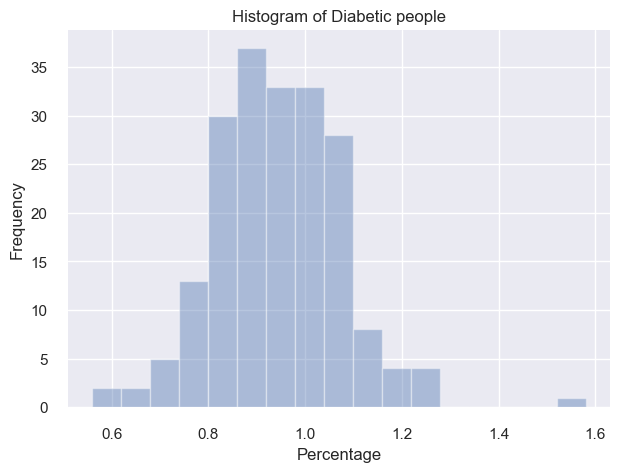

In [7]:
# to produce histogram of the percent of people in 200 samples with diabetes

diabetes_percent=[]
# set probabilities, 0.93% prevalence of diabetes was reported
probabilities = [0.0093,0.9907]
sample_size = 5000

# find percentage of people with diabetes for each sample
for n in range(1,201,1):
    sample_diabetes_outcomes = (np.random.multinomial(sample_size, probabilities))
    diabetes_percent.append(sample_diabetes_outcomes[0]/5000 * 100)

# produce the histogram
plt.figure(figsize=(7,5),dpi=100)
sns.set(style="darkgrid")
p_axes = sns.distplot(diabetes_percent,kde=False)

p_axes.set_title("Histogram of Diabetic people")
p_axes.set_xlabel("Percentage")
p_axes.set_ylabel("Frequency")
#p_axes.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1, fontsize=8)
sns.despine(offset=5)

### Question 6

Compute the 95% confidence interval of the 200 values in #5

##### Function to compute critical value for t-distribution

In [13]:
# to compute critical value for t_distribution, for the given confidence interval percent

def critical_value(confidence_percent):
    
    # define probability
    p = (1-confidence_percent)/2
    df = 10000
    # retrieve critical value 
    value = abs(t.ppf(p,df))
    
    return(value)

##### Function to compute confidence interval

In [14]:
# compute confidence interval for the given sample,given confidence interval percent

def compute_ci(sample,confidence_percent):
    
    #compute mean of sample
    sample_mean = sample.mean()
    #compute standard deviation of the sample
    sample_std = sample.std()
    # calculate sample size
    sample_size = len(sample)
    
    #call function to compute critical value
    z=1.96#critical_value(confidence_percent) 
    
    # compute confidence interval for the sample
    (ci_start,ci_end)=(sample_mean - z * (sample_std/np.sqrt(sample_size)),
                        sample_mean + z * (sample_std/np.sqrt(sample_size)))
    # return confidence interval
    return (ci_start,ci_end)


In [15]:
# define percentage of confidence interval
confidence_percent = 0.95

# call function to compute confidence interval
(CI_start_diab_percent, CI_end_diab_percent) = compute_ci(np.asarray(diabetes_percent),confidence_percent)

print("The confidence interval of 200 diabetes percentage values:",(CI_start_diab_percent,CI_end_diab_percent))

The confidence interval of 200 diabetes percentage values: (0.906670417125689, 0.9451295828743111)


### Question 7

Is the study representative of the general population? Why or why not?


### Explanation
The percentage of prevalence of diabetes was reported as 0.93%. The 95% confidence interval of the percentage of people with diabetes, which was calculated based on 200 iterations, is between 0.90% and 0.94% . The percentage of people with diabetes from the Framingham study is 2.73% , which falls outside the 95% confidence interval, so we can say that the study is not representative of the general population.








### Question 8

Plot the cholesterol values for the people with heart disease, for the people with out heart disease.

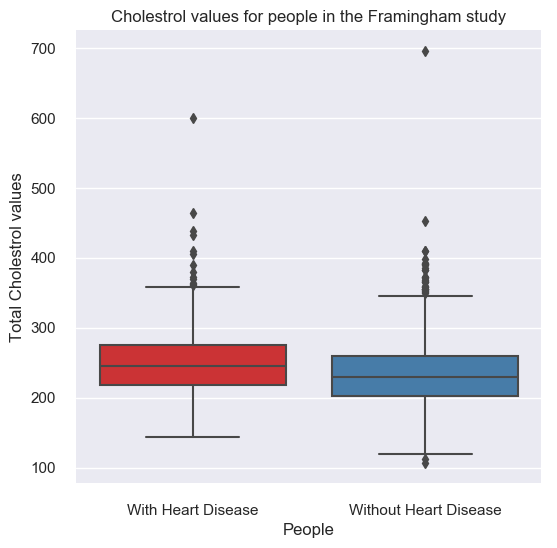

In [16]:
# to plot cholestrol values

# separate people with heart disease and without heart disease
heart_disease_dict={0:"Without Heart Disease",1:"With Heart Disease"}

# define a new column in the data frame
study_df['Heart_Disease']= study_df['ANYCHD'].map(heart_disease_dict)

# plot box plots for each set of people separately
plt.figure(figsize=(6,6),dpi=100)
sns.set(style="darkgrid", palette='Set1')

hd_axes = sns.boxplot(x="Heart_Disease",y="TOTCHOL",data=study_df)
hd_axes.set_title("Cholestrol values for people in the Framingham study")
hd_axes.set_xlabel("People")
hd_axes.set_ylabel("Total Cholestrol values")
sns.despine(offset=5)

### Question 9

Compute the 95% confidence interval of the cholesterol values for the people with heart
disease, for the people with out heart disease.

In [17]:
# read cholestrol values of people with heart disease
with_heart_disease= study_df.loc[study_df.ANYCHD==1]['TOTCHOL']

#read cholestrol values of people without heart disease
without_heart_disease = study_df.loc[study_df.ANYCHD==0]['TOTCHOL']

# specify the confidence interval percent
confidence_percent = 0.95

# get confidence interval values for each set of cholestrol values
(ci_start_with_hd,ci_end_with_hd) = compute_ci(with_heart_disease,confidence_percent)

(ci_start_without_hd,ci_end_without_hd) = compute_ci(without_heart_disease,confidence_percent)

print("The confidence interval for cholestrol values: \n\tFor people with heart disease:",
      (ci_start_with_hd,ci_end_with_hd),"\n\tFor people without heart disease:",(ci_start_without_hd,ci_end_without_hd))

The confidence interval for cholestrol values: 
	For people with heart disease: (246.5439905296654, 252.4203700573367) 
	For people without heart disease: (231.26047070288132, 234.43205007274196)


### Question 10

What can we deduce about cholesterol values and heart disease?


### Explanation

The box plots in #8 shows that the median, upper quartile and lower quartile cholestrol values are higher for people with heart diseae as compared to people without heart disease. This shows that, in general, we can say that people with heart disease tend to have higher cholestrol values than people without heart disease.


# 100/100